## Load necessary libraries

In [10]:
#seismology
from obspy import read
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime

#mapping
import cartopy.crs as ccrs
import cartopy

#plotting
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

#Youtube
from IPython.display import YouTubeVideo

## Show map of the study site

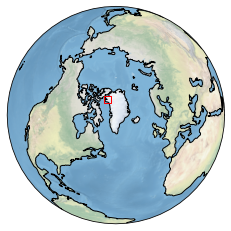

In [53]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=70)) #choose view point
ax.stock_img() #show land type
ax.coastlines(resolution='110m') #get coastlines
ax.plot(-68.55, 77.69, 'rs', markersize=7, markerfacecolor='none', transform=ccrs.Geodetic()) #mark you site

## Zoom to Greenland

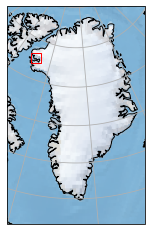

In [12]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=90)) #choose view point
ax.stock_img() #show land type
ax.coastlines(resolution='50m') #get coastlines at higher resolution
ax.plot(-68.55, 77.69, 'rs', markersize=10, markerfacecolor='none', transform=ccrs.Geodetic()) #mark you site
extent = [-60, -30, 55, 85] # select the area to zoom [x1, x2, y1, y2] in degrees
ax.set_extent(extent) #zoom
ax.gridlines() #add grid

## Watch video of iceberg calving at the site (July 8, 2017)

In [13]:
id='n6y4TKJJPeI' #select your favorite YouTubeVideo
YouTubeVideo(id=id, width=600,height=400) #show, size

## Load seismic data from nearby stations

In [14]:
ts=UTCDateTime("2019-07-29T03:40:00") # start time
te=UTCDateTime("2019-07-29T04:00:00") # end time

tt = client.get_waveforms("DK","TULEG","*","HHZ",ts,te) # obtain data from Internet
tt += client.get_waveforms("DK","NEEM","10","BHZ",ts,te) # obtain data from Internet
tt += client.get_waveforms("II","ALE","00","BHZ",ts,te) # obtain data from Internet

## Define the distance from the glacier to each station

In [ ]:
tt[0].stats.distance=126000 # Distance to "TULEG" (m)
tt[1].stats.distance=419000 # Distance to "NEEM" (m)
tt[2].stats.distance=550000 # Distance to "ALE" (m)

## Show stations and glacier

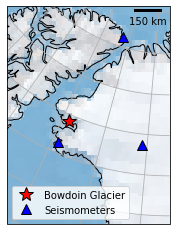

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=90)) #choose view point
ax.stock_img() #show land type
ax.coastlines(resolution='50m') #get coastlines at higher resolution
ax.plot(-68.55, 77.69, 'k*', markersize=15, markerfacecolor='r', transform=ccrs.Geodetic()) #mark you site

LON=[-68.82, -62.35, -51.07] #indicate station Longtitude (deg: - west of Greenwich, + east of Greenwich) 
LAT=[76.53, 82.50, 77.44] #indicate station Latitute (deg: - South hemisphere, + North hemisphere)
ax.plot(LON, LAT, 'k^', markersize=10, markerfacecolor='b', transform=ccrs.Geodetic()) #plot seismometers

extent = [-74, -45, 73.6, 83.5] # select the area to zoom [x1, x2, y1, y2] in degrees
ax.set_extent(extent) #zoom
ax.gridlines() #add grid
ax.legend(['Bowdoin Glacier','Seismometers']) #add explanations

scalebar = ScaleBar(1,box_alpha=0) #define a scale bar 
ax.add_artist(scalebar) #add the scale bar

## Prepare and filter seismic records

In [ ]:
tt.detrend() #detrend seismic data
tt.filter("bandpass", freqmin=0.02, freqmax=0.04, corners=4, zerophase=True) #filter seismic data (range in Hz)

## Show how seismic waves move away from the glacier

In [ ]:
fig = plt.figure(figsize=(10,5)) #make new figure
tt.plot(type='section', 
	offset_min=0, #distance from the glacier
	offset_max=600000, #max distance from the glacier
	recordstart=450, # seconds (min y-axis value)
	recordlength=10*60, # in seconds
	fillcolors=('k','k'), #coloring
	norm_method='trace', 
	orientation='vertical',
	show=False, fig=fig
	);

plt.plot(0,558,'ko', markersize=15, markerfacecolor='r') #glacier earthquake
plt.text(10, 520, 'Glacier', color='r'); # add label
plt.text(130, 520, 'TULEG', color='b'); # add label
plt.text(430, 520, 'NEEM', color='b'); # add label
plt.text(560, 520, 'ALE', color='b'); # add label